In [202]:
import numpy as np
import matplotlib.pyplot as plt

In [203]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [204]:
def euler(f,x0,t0,finalT,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # create the shell for x
    t = np.arange(t0,finalT+h,h)
    x = np.zeros(np.shape(t))
    x[0] = x0
    
    # iterate through x using euler
    for i in range(len(t)):
        if i > 0:
            x[i] = x[i-1] + h*f(x[i-1],t[i-1])
            
    return t, x

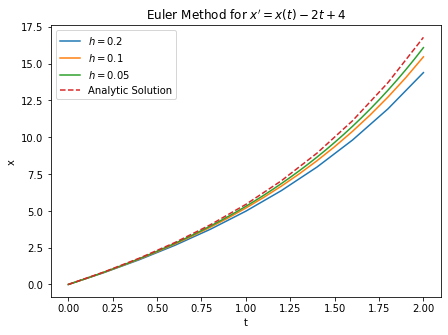

In [205]:
# Define function and inputs for Euler
f = lambda x,t: x - 2*t + 4
deltaT = [0.2,0.1,0.05]
t_ini, finalT = 0,2 # time domain
x0 = 0

# Plot Euler at each h in deltaT
plt.figure(figsize=(7,5))
for h in deltaT:
    #t = np.arange(t_ini,finalT+h,h)
    x = euler(f,x0,t_ini,finalT,h)
    plt.plot(x[0],x[1],label='$h=$'+str(h)) 

# plot the analytic solution
actual = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(t, actual(t), '--', label='Analytic Solution')

plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler Method for $x\'=x(t)-2t+4$')
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [206]:
def midpoint(f,x0,t0,finalT,h):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # create the shell for x
    t = np.arange(t0, finalT+h, h)
    x = np.zeros(np.shape(t))
    x[0] = x0
    
    # iterate through x using euler
    for i in range(len(t)):
        if i > 0:
            x[i] = x[i-1] + h*f(x[i-1]+(h/2)*f(x[i-1],t[i-1]), t[i-1]+(h/2))
            
    return t, x

def rk4(f,x0,t0,finalT,h,dt0=0):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # Initialize the domain and solution vector
    t = np.arange(t0, finalT+h, h)
    if type(x0) == int:
        x = np.zeros(t.size)
    else:
        x = np.zeros((t.size,x0.size))
    x[0] = x0
    
    # Iterate through domain steps
    for i in range(len(t)):
        if i > 0:
            k1 = f(x[i-1], t[i-1])
            k2 = f(x[i-1] + (h/2)*k1, t[i-1]+(h/2))
            k3 = f(x[i-1] + (h/2)*k2, t[i-1]+(h/2))
            k4 = f(x[i-1] + h*k3, t[i])
            x[i] = x[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
            
    return t, x

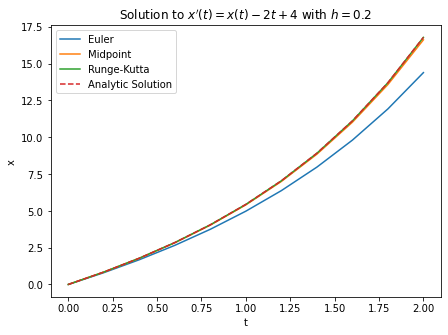

In [207]:
# Define function and inputs for methods
f = lambda x,t: x - 2*t + 4
deltaT = [0.2,0.1,0.05,0.025,0.0125]
t_ini = 0
finalT = 2
x0 = 0

# Plot x for each method at h = 0.2
plt.figure(figsize=(7,5))
x1 = euler(f,x0,t_ini,finalT,0.2)
x2 = midpoint(f,x0,t_ini,finalT,0.2)
x3 = rk4(f,x0,t_ini,finalT,0.2)
plt.plot(x1[0],x1[1],label='Euler')
plt.plot(x2[0],x2[1],label='Midpoint')
plt.plot(x3[0],x3[1],label='Runge-Kutta')
    
actual = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(t, actual(t), '--', label='Analytic Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Solution to $x\'(t)=x(t)-2t+4$ with $h=$'+str(0.2))
plt.show()

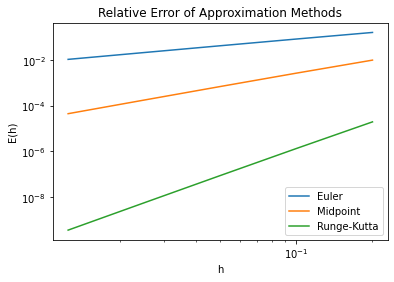

In [208]:
# Define function and inputs for methods
f = lambda x,t: x - 2*t + 4
deltaT = [0.2,0.1,0.05,0.025,0.0125]
t_ini = 0
finalT = 2
x0 = 0

# initialize lists to hold errors for each method
euler_err = []
mid_err = []
rk_err = []

# Find error at each h
for h in deltaT:
    x1 = euler(f,x0,t_ini,finalT,h)[1]
    x2 = midpoint(f,x0,t_ini,finalT,h)[1]
    x3 = rk4(f,x0,t_ini,finalT,h)[1]
    euler_err.append(np.abs(x1[-1]-actual(2)) / np.abs(x1[-1]))
    mid_err.append(np.abs(x2[-1]-actual(2)) / np.abs(x2[-1]))
    rk_err.append(np.abs(x3[-1]-actual(2)) / np.abs(x3[-1]))

# Plot the log-log plot of the errors as a function of h
plt.loglog(deltaT, euler_err, label='Euler')
plt.loglog(deltaT, mid_err, label='Midpoint')
plt.loglog(deltaT, rk_err, label='Runge-Kutta')
plt.legend()
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Relative Error of Approximation Methods')
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

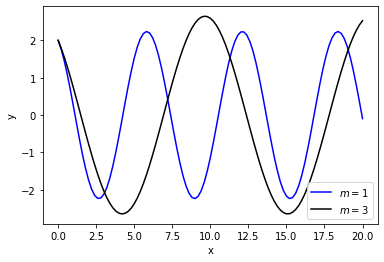

In [209]:
# Use rk4() with m=1, k=1
h = 0.2
m = 1
k = 1
f = lambda x,t: np.array([x[1],(-1*k/m)*x[0]])
t0 = 0
tn = 20
x0 = np.array([2,-1])
x = rk4(f,x0,t0,tn,h)
plt.plot(x[0],x[1][:,0],color='blue',label='$m=1$')

# Use rk4() with m=3, k=1
m = 3
x2 = rk4(f,x0,t0,tn,h)
plt.plot(x2[0],x2[1][:,0],color='black',label='$m=3$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

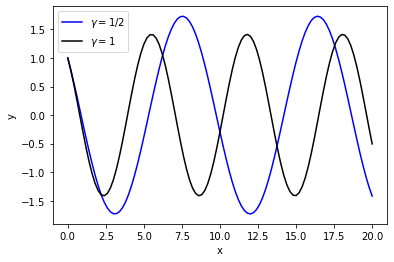

In [210]:
# Use rk4() with gamma=1/2
h = 0.2
gamma = 1/2
f = lambda x,t: np.array([x[1],(-1*gamma)*x[0]])
t0 = 0
tn = 20
x0 = np.array([1,-1])
x = rk4(f,x0,t0,tn,h)
plt.plot(x[0],x[1][:,0],color='blue',label='$\u03B3=1/2$')

gamma = 1
x1 = rk4(f,x0,t0,tn,h)
plt.plot(x1[0],x1[1][:,0],color='black',label='$\u03B3=1$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

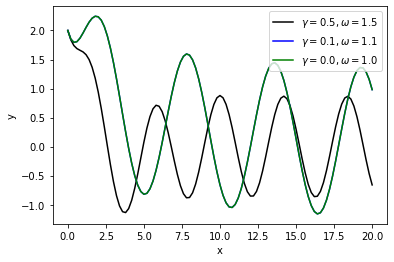

In [211]:
# Use rk4() with gamma=0.5, omega = 1.5
h = 0.2
gamma, omega = 0.5, 1.5
f = lambda x,t: np.array([x[1],2*np.cos(omega*t) + (-1*gamma)*x[0] - x[1]])
t0 = 0
tn = 20
x0 = np.array([2,-1])
x = rk4(f,x0,t0,tn,h)
plt.plot(x[0],x[1][:,0],color='black',label='$\u03B3=' + str(gamma) + ',\u03C9=$' + str(omega))

# Use rk4() with gamma=0.1, omega = 1.1
gamma, omega = .1, 1.1
f = lambda x,t: np.array([x[1],2*np.cos(omega*t) + (-1*gamma)*x[0] - x[1]])
x2 = rk4(f,x0,t0,tn,h)
plt.plot(x2[0],x2[1][:,0],color='blue',label='$\u03B3=' + str(gamma) + ',\u03C9=$' + str(omega))

# Use rk4() with gamma=0.0, omega = 1.0
gamma, omega = 0.0, 1.0
f = lambda x,t: np.array([x[1],2*np.cos(omega*t) + (-1*gamma)*x[0] - x[1]])
x3 = rk4(f,x0,t0,tn,h)
plt.plot(x2[0],x2[1][:,0],color='green',label='$\u03B3=' + str(gamma) + ',\u03C9=$' + str(omega))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()